In [ ]:
from utils.data_utils import read_data
import matplotlib.pyplot as plt
from collections import Counter

tran_data_binary, test_dataset_binary, validation_dataset_binary = read_data(
    "../data/all/combined_lfud_huggingface_binary.csv")

tran_data, test_dataset, validation_dataset = read_data("../data/all/combined_lfud_huggingface_nonfallacies.csv")

In [3]:
def plot_class_distribution(datasets, dataset_names, column='logical_fallacies', title_prefix=''):
    """
    Plots the class distribution for one or more datasets using bar charts.

    Each dataset is expected to be a pandas DataFrame. The function counts the frequency of each class 
    in the specified column and plots a separate bar chart for each dataset to visualize how the classes 
    are distributed.

    Args:
        datasets (list of pd.DataFrame): A list of pandas DataFrames to analyze.
        dataset_names (list of str): A list of names corresponding to each dataset (used in plot titles).
        column (str, optional): The name of the column to analyze for class distribution. 
            Defaults to 'logical_fallacies'.
        title_prefix (str, optional): A prefix to prepend to each subplot title. 
            Useful for adding context (e.g., 'Train - ', 'Test - '). Defaults to ''.

    Returns:
        None: Displays the plot with class distribution for each dataset.
    """
    
    num_datasets = len(datasets)
    fig, axes = plt.subplots(1, num_datasets, figsize=(6 * num_datasets, 5), squeeze=False)

    for idx, (data, name) in enumerate(zip(datasets, dataset_names)):
        class_counts = Counter(data[column])
        labels, values = zip(*sorted(class_counts.items(), key=lambda x: x[0]))

        axes[0, idx].bar(labels, values, color='skyblue')
        axes[0, idx].set_title(f"{title_prefix}{name}")
        axes[0, idx].set_xlabel("Class")
        axes[0, idx].set_ylabel("Frequency")
        axes[0, idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

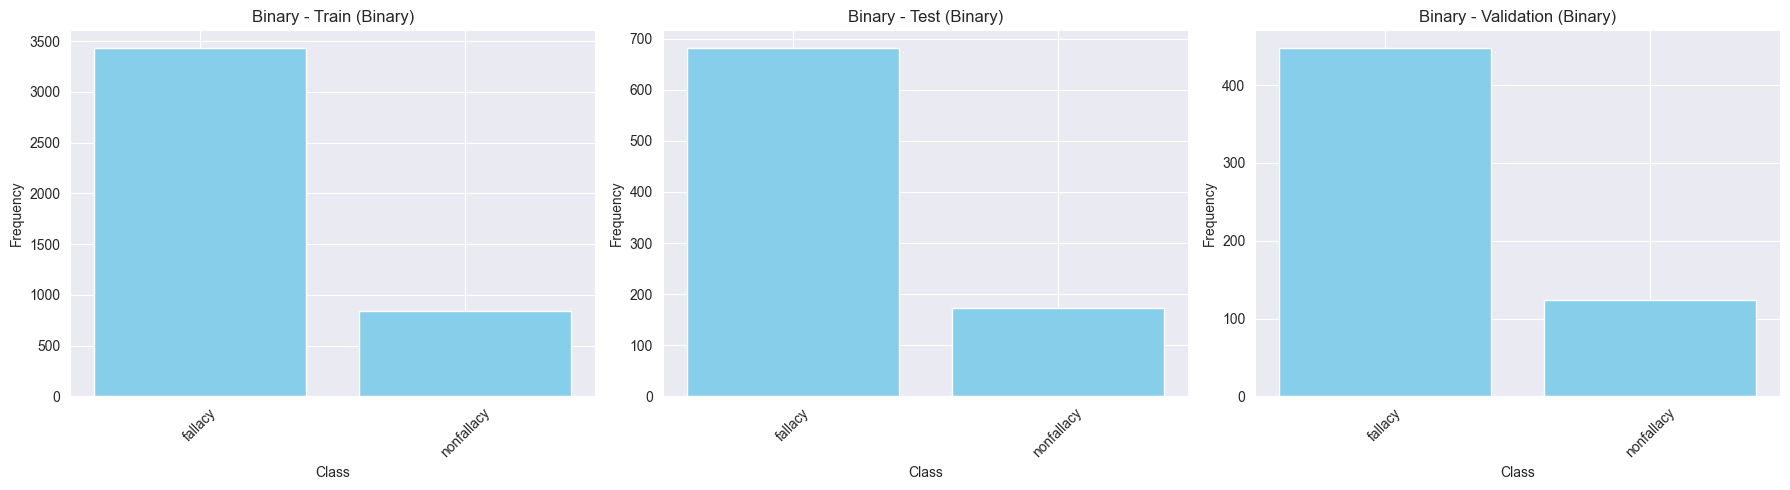

In [4]:
# Plot for binary datasets
plot_class_distribution(
    [tran_data_binary, test_dataset_binary, validation_dataset_binary],
    ["Train (Binary)", "Test (Binary)", "Validation (Binary)"],
    column="logical_fallacies",
    title_prefix="Binary - "
)

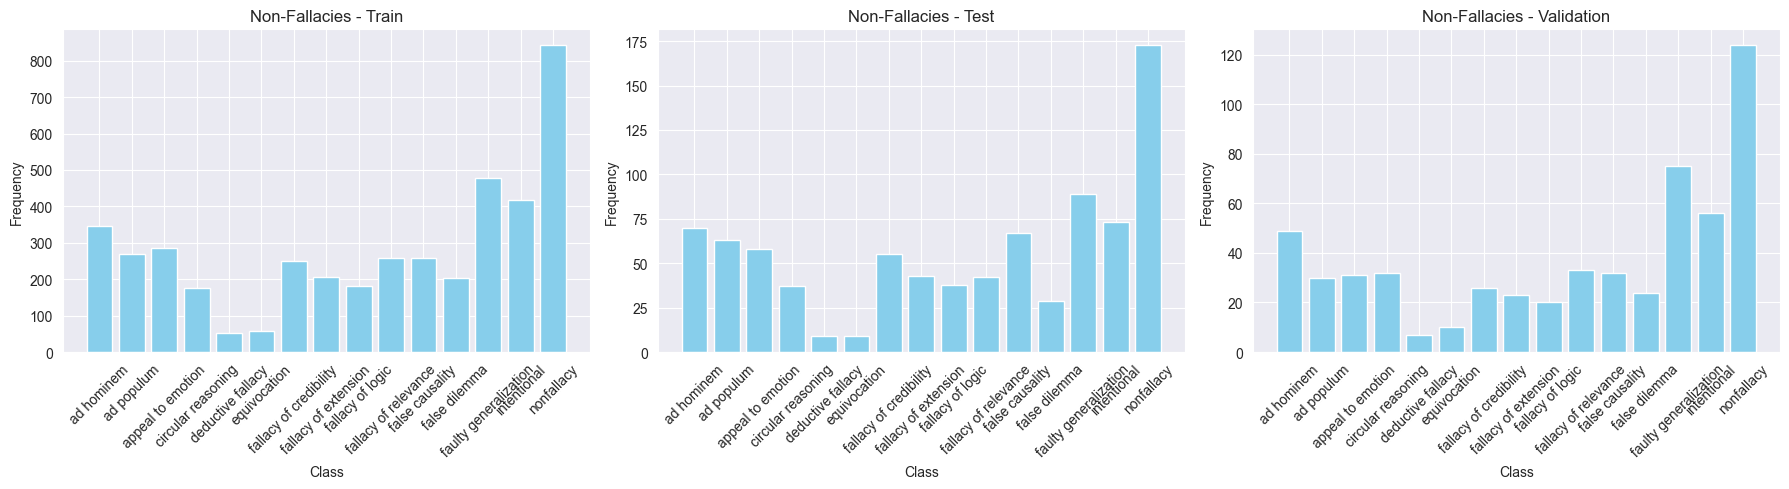

In [5]:
# Plot for non-fallacies datasets
plot_class_distribution(
    [tran_data, test_dataset, validation_dataset],
    ["Train", "Test", "Validation"],
    column="logical_fallacies",
    title_prefix="Non-Fallacies - "
)